# **Titanic - Machine Learning from Disaster**

-------------------------------
## **Project Goal**
-------------------------------

Our goal is to predict if a passenger survived the sinking of the Titanic or not.

- Starting with a linear regression model

----------------------------
## **Dataset Columns (What We're Examining)**
---------------------------
- **Survival:** Survival status of passengers
- **Pclass:** Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Sex:** Sex
- **Age:** Age in years 
- **Sibsp:** Number of siblings/spouses aboard the Titanic
- **Parch:** Number of parents / children aboard the Titanic	
- **Ticket:** Ticket number
- **Fare:** Passanger fare in dollars
- **Cabin:** Cabin number
- **Embarked:** Port of embarkment (C = Cherbourg, Q = Queenstown, S = Southampton)

## Step 1. Importing Necessary Libraries and Dataset Overview

In [46]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Step 2. Loading the data

In [47]:
df = pd.read_csv("D:/Mac/Learning_Resources/Kaggle Projects/titanic/train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Observation:**

* The variable 'Survived' is the target variable to be predicted, and the rest of the variables are independent variables based on which we will predict passangers that survived (Survived).

### Step 3.  Checking the info of the data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observations:**

- Overall there are 891 rows of data. 
- There are 12 columns in dataset, **each column (n = 7) is of numeric data except Name, Sex, Ticket, Cabin, and Embarked.**
- **9 columns have 891 non-null observations except Age = 714 rows, Cabin = 204 rows, and Embarked = 889 rows.** This indicates that some variables have missing data.

## Step 4: Summary Statistics of the Dataset

In [49]:
df = pd.read_csv("D:/Mac/Learning_Resources/Kaggle Projects/titanic/train.csv")
summary_statistics = df.describe()

print(summary_statistics)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


**Observations:**

- Survival Rate: The average survival rate is 38.38%, meaning about 38% of passengers survived, while the remaining 62% did not. The standard deviation of 0.49 suggests a high level of variability in survival across passengers.

- Passenger Class (Pclass): The average passenger class is 2.31, which indicates that most passengers were in the lower (second and third) classes. The standard deviation of 0.84 suggests that there is a reasonable spread among the three classes (1st, 2nd, and 3rd). The minimum and maximum values range from 1 to 3, confirming that passengers were distributed across all three classes.

- Age: The average age of the passengers is 29.70 years, with a standard deviation of 14.53 years, suggesting significant age variability among passengers. The minimum age is 0.42 years (likely an infant), and the maximum age is 80 years, showing a wide range of ages. Notably, the age count is lower than other variables (714 instead of 891), indicating missing values for some passengers.

- Number of Siblings/Spouses (SibSp): On average, passengers had 0.52 siblings or spouses onboard, with a standard deviation of 1.10, indicating that most passengers traveled alone or with just one companion. The maximum number of siblings/spouses is 8, suggesting that a few passengers traveled with large families.

- Number of Parents/Children (Parch): The average number of parents or children aboard is 0.38, with a standard deviation of 0.81, suggesting that most passengers did not have parents or children traveling with them. The maximum number is 6, indicating a few passengers had larger family groups with them.

- Fare: The average fare paid by passengers is 32.20 units, with a large standard deviation of 49.69, indicating a significant variation in ticket prices. The minimum fare is 0 (indicating some passengers traveled for free), while the maximum is 512.33, showing that some passengers paid very high fares, likely for first-class accommodations.


**Summary:**
- Survival: Only about 38% of passengers survived, with a wide range of outcomes across different passenger groups.
- Pclass: Most passengers traveled in the lower classes, with class 3 being the most common.
- Age: Passengers' ages ranged widely, from infants to elderly passengers.
- SibSp and Parch: Most passengers traveled alone or with one companion, and relatively few traveled with large families.
- Fare: There is a large variation in fares, likely reflecting differences in passenger class and accommodations.

## Step 5. Checking the Distribution of the Variables

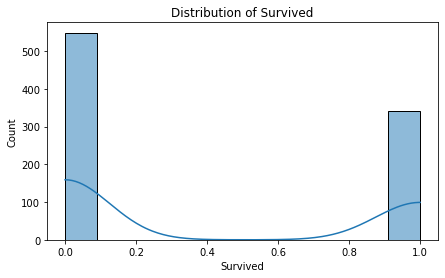

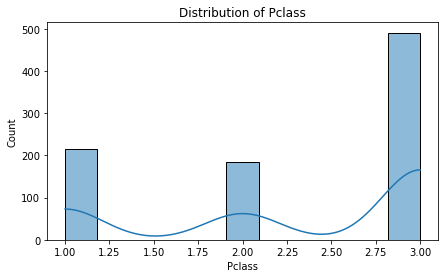

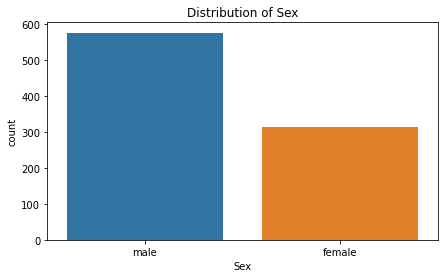

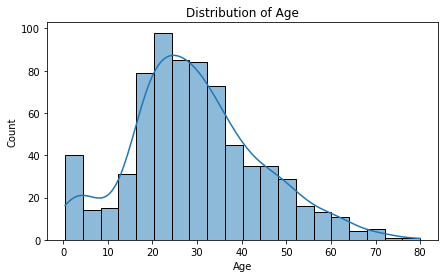

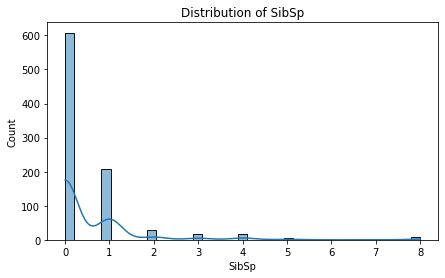

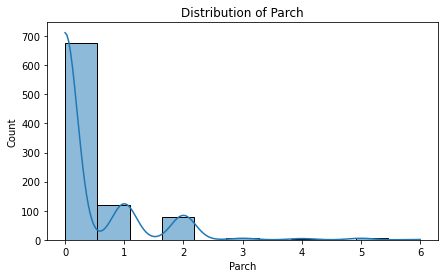

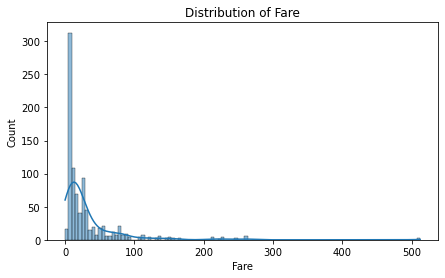

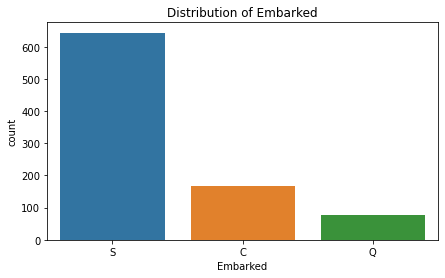

In [50]:
# Plotting all the columns to look at their distributions
# List of specific columns to plot
columns_to_plot = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Loop through each of the specified columns and plot their distributions
for i in columns_to_plot: 
    
    plt.figure(figsize=(7, 4))  # Set the size of the plot
    
    # Check if the column is categorical ('Sex', 'Embarked') or numerical
    if df[i].dtype == 'object':  # For categorical columns
        sns.countplot(data=df, x=i)  # Use a count plot for categorical data
    else:  # For numerical columns
        sns.histplot(data=df, x=i, kde=True)  # Use a histogram with KDE for numerical data
    
    plt.title(f'Distribution of {i}')  # Set the title of the plot
    plt.show()  # Show the plot

**Observations:**

- Survived: The majority of passengers (about 550) did not survive, with about 350 surviving. The data shows an imbalance between survivors and non-survivors.

- Pclass: Most passengers were in third class, with fewer in first and second class. The large number of third-class passengers suggests socioeconomic differences aboard the Titanic.

- Sex: There were about twice as many male passengers (around 600) as female passengers (around 300).

- Age: The age distribution is roughly normal, peaking between 20-30 years, with fewer young children and elderly passengers. Most passengers were young to middle-aged.

- SibSp: Most passengers traveled alone or with one sibling/spouse. Few passengers had larger family groups aboard, as indicated by the long tail in the distribution. 

- Parch: Similar to SibSp, most passengers(about 700) did not travel with parents or children. Only a small number had one or more dependents aboard, with the count diminishing rapidly as the number of dependants increased.

- Fare: The fare distribution is highly skewed to the right, with most passengers paying relatively low fares. A few passengers paid significantly higher fares, with a long tail extending beyond 500 dollars. This highlights the socioeconomic diversity among the passengers.

- Embarked: Most passengers boarded at Southampton, with fewer from Cherbourg and Queenstown. This highlights Southampton as the primary embarkation point.

## Step 6: Bivariate Analysis - Heat-map

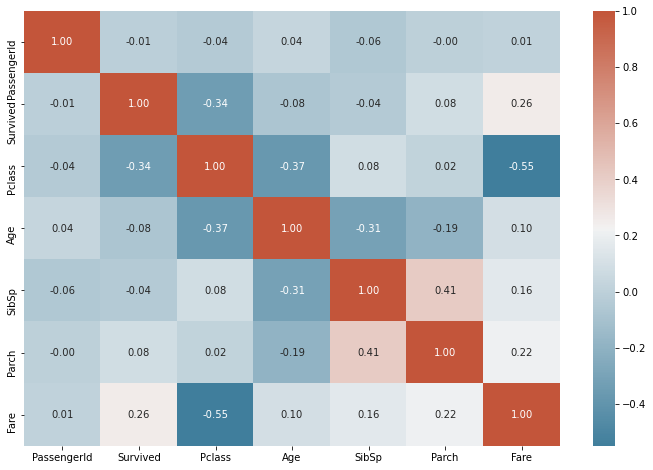

In [51]:
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show()

**Observations:**

- **Pclass and Fare (Strongest Negative Correlation):** There is a strong negative correlation (-0.55) between **Pclass** and **Fare**, indicating that passengers in lower classes (higher Pclass values) generally paid less for their tickets.

- **Pclass and Survived:** **Pclass** has a moderate negative correlation with **Survived** (-0.34), suggesting that passengers in lower classes had a lower survival rate. This may indicate that first-class passengers were more likely to survive compared to those in third class.

- **SibSp and Parch:** A positive correlation (0.41) exists between **SibSp** (number of siblings/spouses aboard) and Parch (number of parents/children aboard), implying that passengers who traveled with siblings/spouses were also likely to have parents or children with them.

- **Fare and Survived:** **Fare** and Survived have a positive correlation (0.26), indicating that passengers who paid higher fares were more likely to survive, possibly due to better access to life-saving resources or conditions related to higher-class accommodations.

- **Age and Pclass:** There is a negative correlation (-0.37) between **Age** and **Pclass**, which suggests that older passengers were more likely to be in higher classes (lower Pclass values), possibly due to the socioeconomic status of older individuals.

- **Fare and Parch/SibSp:** Fare is weakly positively correlated with both **Parch** (0.22) and **SibSp** (0.16), suggesting that passengers with family members aboard (more dependents) tended to pay slightly higher fares, possibly because they were booking for multiple people.

- **Other Correlations:** The remaining correlations are weak, indicating little to no linear relationship between these pairs of variables (such as between **Age** and **Survived**, or **Parch** and **Survived**).

**Summary:**
- **Fare** and **Pclass** have a strong relationship, and both affect survival. Higher-class passengers paid more and had a higher chance of surviving.
- Family-related variables like **SibSp** and **Parch** show some interdependence, as larger families likely traveled together. However, these do not seem to strongly impact survival.

## Step 7: Bivariate Analysis - Visualizing Relationships with Scatter Plots

### Passanger Class and Fare

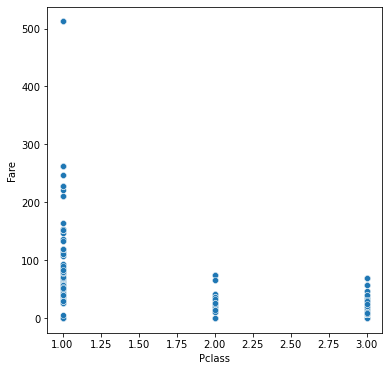

In [52]:
# Scatterplot to visualize the relationship between Passanger Class and Fare
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Pclass', y = 'Fare', data = df)

plt.show()

**Observations:**
- There is a clear distinction between fare amounts across the different classes. First-class passengers paid the highest fares, with one extreme value above 500. Second-class fares are lower, while third-class passengers paid the least. This reflects the hierarchical nature of the ticket prices across the classes.

### Passanger Class and Survival Status

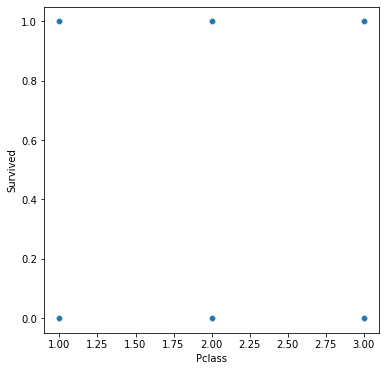

In [53]:
# Scatterplot to visulaize the relationship between Passanger Class and Survival Status.
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Pclass', y = 'Survived', data = df)

plt.show()

**Observations:**
- Survival is distributed across all three classes, but no clear pattern is evident from this plot alone. More in-depth analysis could reveal trends in survival rates based on class, but the scatter plot alone shows the presence of both survivors and non-survivors in all classes.

### Number of Siblings and Number of Parents

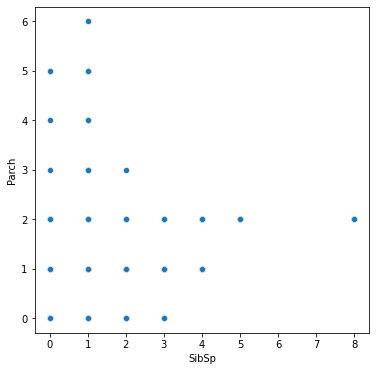

In [54]:
# Scatterplot to visualize the relationship between Number of Siblings and  Number of Parents.
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'SibSp', y = 'Parch', data = df)

plt.show()

**Observations:**

- There is a clustering of values near the origin, indicating that many passengers traveled with few siblings/spouses or parents/children. Larger families (higher values of SibSp and Parch) are rarer in the dataset, with a few extreme cases of larger groups traveling together.

### Passenger Fare and Survival Status

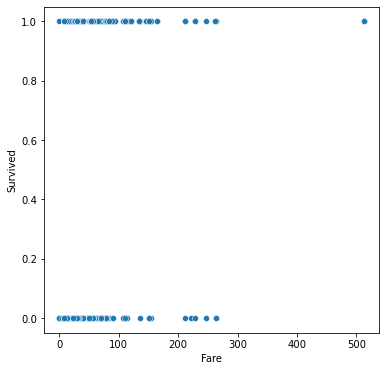

In [55]:
    # Scatterplot to visulaize the relationship between Passanger Fare and Survival Status
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Fare', y = 'Survived', data = df)

plt.show()

**Observations:**

- Most of the passengers who did not survive had lower fares, while many of those who survived appear to have paid higher fares. This suggests a potential relationship between higher fare and increased chances of survival, possibly due to better access to resources.

### Age and Passenger Class

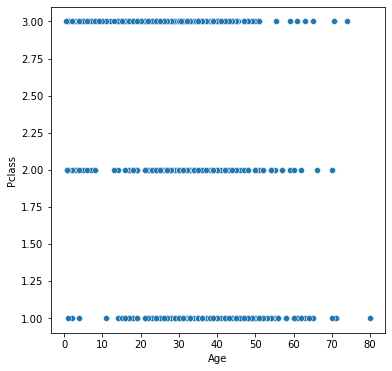

In [56]:
# Scatterplot to visulaize the relationship between Age and Passenger Class.
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Age', y = 'Pclass', data = df)

plt.show()

**Observations:**
- Passengers of all ages are present across the three classes, though the majority of older passengers seem to be in the first and second classes. Third-class passengers appear to be generally younger on average.

### Number of Siblings and Passenger Fare

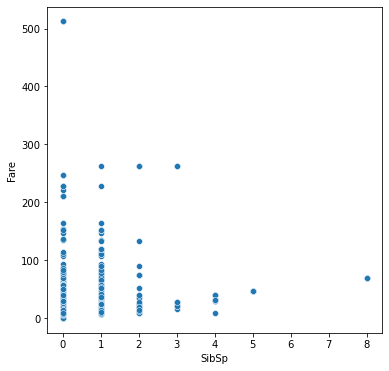

In [57]:
# Scatterplot to visualize the relationship between Number of Siblings and Passanger Fare.
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'SibSp', y = 'Fare', data = df)

plt.show()

**Observations:**

- Passengers with no siblings or spouses paid a wide range of fares, while those traveling with 1-2 siblings/spouses mostly paid lower fares. A few outliers with larger families paid higher fares.

### Number of Family and Passanger Fare

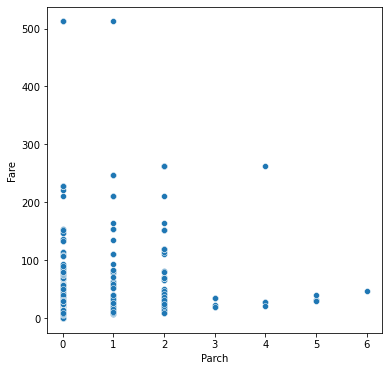

In [58]:
# Scatterplot to visualize the relationship between Number of Family Members and Passenger Fare.
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Parch', y = 'Fare', data = df)

plt.show()

**Observations:**

- Similar to the SibSp vs Fare plot, passengers with no parents/children paid a wide range of fares, while those traveling with parents/children paid slightly higher fares. A few outliers paid significantly more.

### Age and Number of Siblings

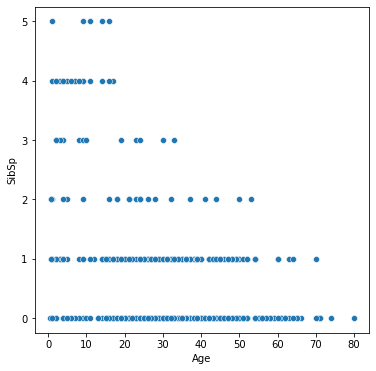

In [119]:
# Scatterplot to visualize the relationship between Distance to Work and Air Quality
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'Age', y = 'SibSp', data = df)

plt.show()

**Observations:**

- Passengers with no siblings/spouses span all age groups, while those with 1-2 siblings/spouses are more concentrated in the younger age groups. Large families (higher SibSp values) are relatively rare and tend to be younger.

## Step 8: Splitting the Dataset into Train and Test Sets

In [120]:

# Separate the dependent variable and independent variables
X = df.dropna(subset = {'Age'})

Y = X['Survived']

X = X.drop(columns = {'Survived', 'PassengerId', 'Name', 'Sex','Ticket','Cabin','Embarked'})

# Add the intercept term
X = sm.add_constant(X)

summary_statistics = X.info()

print(summary_statistics)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   const   714 non-null    float64
 1   Pclass  714 non-null    int64  
 2   Age     714 non-null    float64
 3   SibSp   714 non-null    int64  
 4   Parch   714 non-null    int64  
 5   Fare    714 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 39.0 KB
None


In [121]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)

## Step 9: Checking for Multicollinearity using VIF

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif


print(checking_vif(X_train))

  feature        VIF
0   const  29.045328
1  Pclass   1.714557
2     Age   1.292372
3   SibSp   1.245473
4   Parch   1.203214
5    Fare   1.544627


**Observations:**
- No variable has a VIF value greater than 5, therefore there is noo multicollinearity in the data.

## Step 10: Creating the Linear Regression Model & Model Summary

In [123]:
# create the linear regression model
model1 = sm.OLS(y_train, X_train).fit()
# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     31.38
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           1.36e-28
Time:                        03:09:13   Log-Likelihood:                -385.61
No. Observations:                 642   AIC:                             783.2
Df Residuals:                     636   BIC:                             810.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2096      0.094     12.830      0.000       1.024       1.395
Pclass        -0.2544      0.027     -9.327      0.000      -0.308      -0.201
Age           -0.0082      0.001     -5.923      0.000      -0.011      -0.005
SibSp         -0.0511      0.022     -2.328      0.020      -0.094      -0.008
Parch          0.0487      0.022      2.188      0.029       0.005       0.092
Fare           0.0005      0.000      1.323      0.186      -0.000       0.001
==============================================================================
Omnibus:                      196.512   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.577
Skew:                           0.309   Prob(JB):                     1.54e-09
Kurtosis:                       1.934   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations:**

- The R-squared value is 0.198, which indicates that the model explains 19.8% of the variance in the dependent variable. This value means the model performs poorly in predicting the behaviour of the dataset, meaning other models should be explored. The high AIC (783.2) and BIC (810) values also confirm this. 

- The intercept (constant) of the model is 1.2096, and all the predictor variables have non-zero coefficients.

- The p-values for Fare is greater than 0.05, which indicates that this predictor variable is statistically insignificant in predicting the dependent variable.

- The coefficients of the predictor variables indicate the direction and strength of their relationship with the dependent variable. All except number of family memebers and Fare have a negative coefficient in relation to the outcome (survival status).

- The diagnostic statistics indicate that the residuals are not normally distributed and are slightly skewed to the right, but there is no significant autocorrelation among the residuals.

## Step 11: Dropping Insignificant Variables and Re-creating the Model

In [130]:
# Separate the dependent variable and independent variables
X = df.dropna(subset = {'Age'})

Y = X['Survived']

X = X.drop(columns = {'Survived', 'PassengerId', 'Name', 'Sex','Ticket', 'Fare','Cabin','Embarked'})
X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)

# Create the model
model2 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     38.74
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           4.80e-29
Time:                        03:12:39   Log-Likelihood:                -386.49
No. Observations:                 642   AIC:                             783.0
Df Residuals:                     637   BIC:                             805.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2733      0.081     15.702      0.000       1.114       1.433
Pclass        -0.2745      0.023    -12.121      0.000      -0.319      -0.230
Age           -0.0083      0.001     -6.010      0.000      -0.011      -0.006
SibSp         -0.0491      0.022     -2.242      0.025      -0.092      -0.006
Parch          0.0543      0.022      2.487      0.013       0.011       0.097
==============================================================================
Omnibus:                      209.832   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.419
Skew:                           0.294   Prob(JB):                     1.67e-09
Kurtosis:                       1.921   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 12: Checking Assumptions for Linear Regression

1. Mean of residuals should be 0
2. No Heteroscedasticity
3. Linearity of variables
4. Normality of error terms

### Step 12 - Assumption 1. Check for mean residuals

In [131]:
residuals = model2.resid
np.mean(residuals)

-3.061586982548874e-15

**Observations:**

- The mean of the residuals is approximately zero, which satisfies one of the linear regression assumptions that the mean of residuals should be zero. This indicates that the linear regression model has been fit correctly to the data and the model is unbiased. 

### Step 12 - Assumption 2. Check for homoscedasticity

In [132]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [133]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(model2.resid, model2.model.exog)

lzip(name, test)

[('F statistic', 1.1047309836288408), ('p-value', 0.18824071651571025)]

**Observations:**

- The p-value is greater than 0.05, indicating that there is no significant evidence of heteroscedasticity in the model. This satisfies one of the linear regression assumptions that there should be no heteroscedasticity in the error terms.

### Step 12 - Assumption 3. Linearity of variables

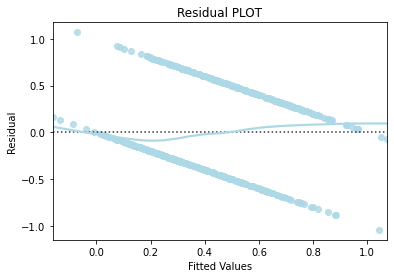

In [134]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")

sns.residplot(x=fitted, y=y_train, color="lightblue", lowess=True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()


**Observations:**
- Pattern: The residuals are not randomly distributed around the horizontal line (which represents zero). Instead, there is a clear pattern in the residuals, where they form distinct lines. This indicates that there may be some underlying structure in the data that the model has not captured well.
- Shape: The residuals seem to spread out as the fitted values increase, which could indicate heteroscedasticity—a condition where the variance of the residuals is not constant across all levels of the fitted values. In a good model, residuals should have constant variance (homoscedasticity).
- Clustering: The plot shows two distinct bands of residuals (above and below the zero line), which could suggest that there are categorical or binary variables in the data that have not been modeled appropriately, or some non-linearity that the current model is not capturing.
- Conclusion: The residual plot indicates potential issues with the model, such as heteroscedasticity and non-linearity. This suggests that the model may not be adequately capturing the relationships in the data, and adjustments, such as transforming variables or using a different model, may be necessary.

### Step 12 - Assumption 4. Normality of error terms

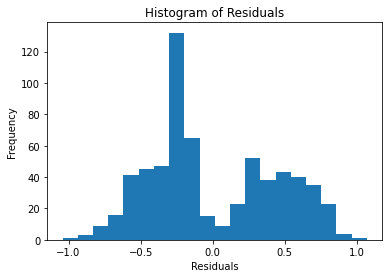

In [141]:
# Plot histogram of residuals

residuals = model2.resid

plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

Observations:
- Slightly Skewed Distribution: The residuals are not perfectly symmetric. The histogram shows a higher concentration of residuals around the slightly negative side (between -0.5 and 0), which suggests some negative skew. This may indicate that the model is under-predicting slightly more than it over-predicts.

- Peak around Zero: The majority of the residuals are centered around zero, which is a good sign. It indicates that most predictions made by the model are close to the actual values, with small errors.

- Multimodal Distribution: There appear to be multiple peaks in the residual distribution, which could indicate that the model is not fully capturing some underlying structure or relationships in the data. This might suggest a need for further investigation, possibly due to missing variables or a need for a more complex model.

- Conclusion: The residuals are fairly centered around zero, but the slight negative skew and multimodal pattern indicate that the model may not be fully capturing the relationships in the data. Further model refinement, transformations, or additional features may be needed.

## Step 13 - Q-Q Plot for Checking Normality of Error Terms

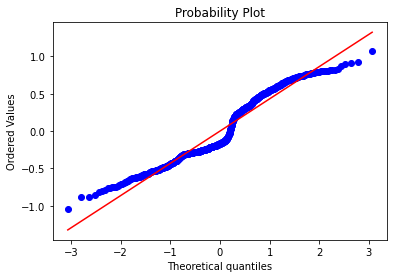

In [142]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

## Step 14 - Model Performance Comparison on Train and Test Data

In [137]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  

    Data      RMSE       MAE  MAPE
0  Train  0.441790  0.392082   inf
1   Test  0.439442  0.369989   inf


**Observations:**

- The root mean squared error (RMSE) of the test dataset (0.4417) is slightly higher than that of the training dataset (0.4394), indicating that the model performs slightly worse on the test dataset than on the training dataset.

- The mean absolute error (MAE) of the test dataset (0.392) is higher than that of the training dataset (0.369), which also indicates that the model performs slightly worse on the test dataset.

- The MAPE value is infinite (inf) for both the training and test sets. This usually happens when there are very small or zero actual values in the dataset, causing division by zero or extremely large percentages, making MAPE invalid.

**Conclusion**
- The model shows consistent performance between training and test sets based on RMSE and MAE, which is a good sign of generalization.

- However, the MAPE being infinite suggests there may be a problem in the data, such as zero values in the target variable. You might need to handle those values differently, or MAPE may not be an appropriate metric for this dataset.

## Step 15 - Applying Cross Validation and Evaluation

In [138]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.169 (+/- 0.286)
Mean Squared Error: 0.199 (+/- 0.066)


## Step 16 - Extracting and Creating a DataFrame (table) of Coefficients

In [139]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,1.273332
1,Pclass,-0.274531
2,Age,-0.008264
3,SibSp,-0.049098
4,Parch,0.054345


## Step 17 - Writing the Linear Regression Equation and Coefficients

In [140]:
# Write the equation of the fit

Equation = "log (House Price) = "

print(Equation, end = '\t')

for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (House Price) = 	( 1.2733321608517056 ) *  const + ( -0.2745306820696011 ) *  Pclass + ( -0.008263626738003842 ) *  Age + ( -0.04909838114961481 ) *  SibSp + ( 0.0543452155973332 ) *  Parch + 